Fitur yang dipakai :
- TFIDF Word
- WH word

In [31]:
import pandas as pd
import numpy as np
import csv
from nltk.tokenize import word_tokenize
import pickle
from sklearn import preprocessing
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

1807
ENTY    517
NUM     439
HUM     351
LOC     233
DESC    188
ABBR     79
Name: Coarse, dtype: int64


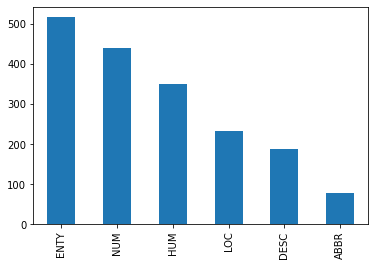

In [32]:
dataset = 'dataset-question-classification-csv.csv'
dataset=pd.read_csv(dataset,sep=';')
print(len(dataset))
import matplotlib.pyplot as plt
print(dataset['Coarse'].value_counts(dropna=False))
pd.value_counts(dataset['Coarse'],dropna=False).plot.bar()

In [33]:
def wh_tag(doc):
    wh_tag_list = {'apa': 1, 'apakah': 2, 'dimana': 3, 'di mana': 3, 'bagaimana':4, 'bagaimanakah':4, 'mengapa':5, 'kenapa':6, 'siapa':7, 'siapakah':7, 'kapan':8, 'kemana':9, 'dari mana':10, 'berapa':11, 'berapakah':11, 'mana':12, 'manakah':12, 'dimanakah':13}
    result = []
    wh_tags = []
    for t in word_tokenize(doc):
        if t in wh_tag_list:
            wh_tags.append(wh_tag_list[t])
    if not wh_tags:#If empty
        result.append(0) #none tag
    else:
        result.append(wh_tags[0])
    return result

In [66]:
sen_class = 1

target = 'dataset-question-classification-csv.csv'
with open(target,'r',encoding='utf-8') as csvFile:
    csvReader = csv.reader(csvFile, delimiter=';')
    next(csvReader)
    
    text = []
    classes = []
    tag_wh_new = []
    
    for row in csvReader:
        
        sentence = row[0].lower()
        
        if sen_class == 1:
            sentenceclass =row[1] #row[1]=coarse - row[2]=fine
        elif sen_class == 2:
            sentenceclass =row[2] #row[1]=coarse - row[2]=fine
            
        classes.append(sentenceclass)
        
        tag_wh_new.append(wh_tag(sentence.lower()))
        
        text.append(sentence)

In [67]:
tfidf_vectorizer = TfidfVectorizer()
#Eksport TFIDF model
tfidf_vectorizer.fit(text)
pickle.dump(tfidf_vectorizer, open('newest-tfidf.pkl', 'wb'));

#Eksekusi TFIDF seperti biasanya
tfidf_feature = tfidf_vectorizer.transform(text)
documents_text = tfidf_feature.toarray()
documents_text = documents_text.tolist()

# Insert WH Tag 
i=0
for xxxxx in documents_text:
    documents_text[i].insert(0,tag_wh_new[i][0])
    i+=1
    

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

a_train, a_test, b_train, b_test = train_test_split(documents_text, classes, test_size=0.30, random_state=42)

In [68]:
#SVM model Coarse Category
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(a_train,b_train)

predictions = model.predict(a_test)
print(classification_report(b_test,predictions,digits=3))
print('\n\n')


              precision    recall  f1-score   support

        ABBR      1.000     0.857     0.923        21
        DESC      0.881     0.771     0.822        48
        ENTY      0.824     0.934     0.876       166
         HUM      0.968     0.891     0.928       101
         LOC      0.883     0.803     0.841        66
         NUM      0.979     0.986     0.983       143

    accuracy                          0.906       545
   macro avg      0.923     0.874     0.895       545
weighted avg      0.910     0.906     0.906       545






In [65]:
#SVM model Fine Category
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(a_train,b_train)

predictions = model.predict(a_test)
print(classification_report(b_test,predictions,digits=3))
print('\n\n')

pickle.dump(model, open("newest-model-fine.pkl", 'wb'))

c:\users\fandy\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

  abbreviation      0.500     1.000     0.667         5
        animal      0.857     0.857     0.857        14
          body      1.000     0.667     0.800         6
          city      1.000     0.875     0.933         8
          code      1.000     0.750     0.857         4
         color      1.000     0.900     0.947        10
         count      0.564     0.886     0.689        35
       country      0.846     0.917     0.880        12
      creation      0.750     0.857     0.800        14
      currency      1.000     1.000     1.000         5
          date      0.875     0.933     0.903        15
    definition      0.583     1.000     0.737         7
   description      0.500     0.625     0.556         8
        dismed      1.000     0.417     0.588        12
      distance      0.727     0.667     0.696        12
     entyother      0.217     0.333     0.263        15
         event      0.800     1.000     0.889  